## Simulation-Based Hypothesis Test: Death Penalty and Murder Rates

This project investigates whether states with the death penalty tend to have lower murder rates than states without it. Using data on U.S. states from 1971, we compare the average murder rates between death penalty and non–death penalty states. A randomization (permutation) test simulates thousands of shuffled labelings of “death penalty” status to determine whether the observed difference in mean murder rates could occur by chance. The objective is to evaluate whether having the death penalty is statistically associated with reduced murder rates, or if any difference is likely due to random variation.

In [1]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
change_in_death_rates = Table.read_table('change_in_death_rates.csv')
change_in_death_rates

State,Year,Population,Murder Rate,Death Penalty
Alabama,1971,3479000,15.1,True
Arizona,1971,1849000,6.7,True
Arkansas,1971,1944000,10.5,True
California,1971,20223000,8.1,True
Colorado,1971,2283000,6.5,True
Connecticut,1971,3081000,3.1,True
Delaware,1971,558000,6.1,True
Florida,1971,7041000,13.3,True
Georgia,1971,4664000,16,True
Idaho,1971,732000,3.3,True


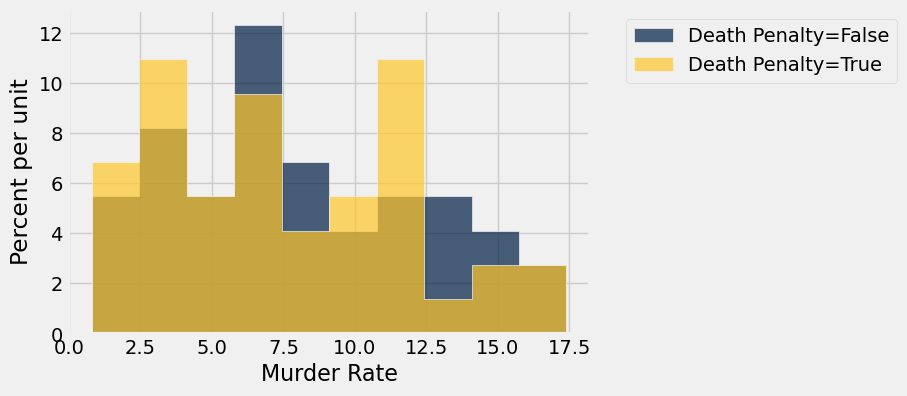

In [3]:
change_in_death_rates.hist('Murder Rate', group = 'Death Penalty')

In [4]:
rate_means = change_in_death_rates.select('Death Penalty', 'Murder Rate').group('Death Penalty', np.mean)
rate_means

Death Penalty,Murder Rate mean
False,8.12045
True,7.51364


In [5]:
observed_difference = rate_means.column('Murder Rate mean').item(0) - rate_means.column('Murder Rate mean').item(1)
observed_difference

0.6068181600659095

In [6]:
def find_test_stat(table, labels_col, values_col):
    reduced = table.select(labels_col, values_col)
    means_table = reduced.group(labels_col, np.mean)
    means = means_table.column(1)
    return means.item(0) - means.item(1)
find_test_stat(change_in_death_rates, "Death Penalty", "Murder Rate")

0.6068181600659095

In [7]:
def simulate_and_test_statistic(table, labels_col, values_col):
    shuffled_label = table.sample(with_replacement = False).column(labels_col)
    shuffled_table = table.with_column('Shuffled Label', shuffled_label)
    return find_test_stat(shuffled_table, 'Shuffled Label', values_col)
    
simulate_and_test_statistic(change_in_death_rates, "Death Penalty", "Murder Rate")

-1.6704545901159076

In [9]:
differences = make_array()

for i in np.arange(5000):
    differences = np.append(differences, simulate_and_test_statistic(
        change_in_death_rates, "Death Penalty", "Murder Rate"))                                              

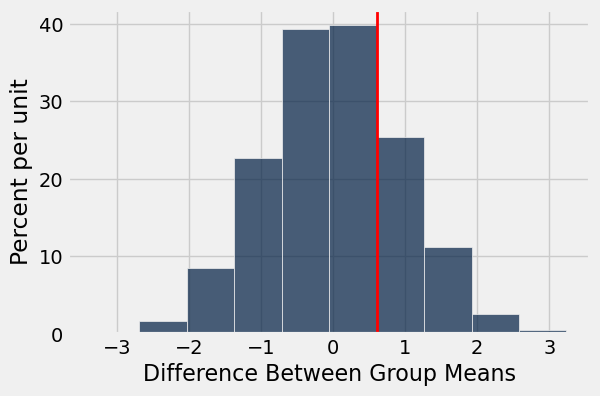

In [10]:
Table().with_column('Difference Between Group Means', differences).hist()
plots.axvline(observed_difference, color='red', lw=2);

In [11]:
empirical_P = np.mean(differences >= observed_difference)
empirical_P

0.25979999999999998